# Import Data

In [1]:
# clear memory
%reset -f

# helper.py
from helper import *

In [2]:
# load data
df = pd.read_csv('./data/clean/fantasy_data.csv')

# ensure values are sorted properly
df = df.sort_values(by=['Key', 'Exp']).reset_index(drop=True)

# drop non-normalized columns
df = drop_total_volume_cols(df)

# rename target col
df = df.rename(columns={'PPGTarget_half-ppr': 'target'})

# check a row
df.sample()

,Player,Tm,Pos,Age,Key,Year,games_played_pct,games_started_pct,Exp,Pass_Cmp_per_game,Pass_Att_per_game,Pass_Yds_per_game,Pass_TD_per_game,Pass_Int_per_game,Rush_Att_per_game,Rush_Yds_per_game,Rush_TD_per_game,Rec_Tgt_per_game,Rec_Rec_per_game,Rec_Yds_per_game,Rec_TD_per_game,Fmb_per_game,FmbLost_per_game,Scrim_TD_per_game,Scrim_Yds_per_game,Touches_per_game,PPG_half-ppr,PPT_half-ppr,PPGOvrRank_half-ppr,PPGPosRank_half-ppr,PPTOvrRank_half-ppr,PPTPosRank_half-ppr,target
12291,Austin Hooper,TEN,TE,28,HoopAu00,2022,1.0,0.117647,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.529412,2.411765,26.117647,0.117647,0.0,0.0,0.117647,26.117647,2.411765,4.523529,1.87561,257,33,183,58,2.111765


- We will be using normalized features (per-game stats and other percentages) along with __PPG half-ppr fantasy points__ as the target. 
- This will not punish players for missing games or getting injured (which is unfortunate but very common in the NFL).
- A [seperate model]() will be trained to determine injury probability based on past volume and games missed.

# Create Features

In [3]:
# aggregate data by player
features = create_features(df)

# show shape and nulls
show_shape_and_nulls(features)

Shape: (29369, 183)
Null values:


,Age,Exp,FmbLost_per_game,FmbLost_per_game_3y_mean,FmbLost_per_game_3y_std,FmbLost_per_game_career_mean,FmbLost_per_game_career_std,FmbLost_per_game_career_trend_slope,FmbLost_per_game_momentum,Fmb_per_game,Fmb_per_game_3y_mean,Fmb_per_game_3y_std,Fmb_per_game_career_mean,Fmb_per_game_career_std,Fmb_per_game_career_trend_slope,Fmb_per_game_momentum,Key,PPGOvrRank_half-ppr,PPGOvrRank_half-ppr_3y_mean,PPGOvrRank_half-ppr_3y_std,PPGOvrRank_half-ppr_career_mean,PPGOvrRank_half-ppr_career_std,PPGOvrRank_half-ppr_career_trend_slope,PPGOvrRank_half-ppr_momentum,PPGPosRank_half-ppr,PPGPosRank_half-ppr_3y_mean,PPGPosRank_half-ppr_3y_std,PPGPosRank_half-ppr_career_mean,PPGPosRank_half-ppr_career_std,PPGPosRank_half-ppr_career_trend_slope,PPGPosRank_half-ppr_momentum,PPG_half-ppr,PPG_half-ppr_3y_mean,PPG_half-ppr_3y_std,PPG_half-ppr_career_mean,PPG_half-ppr_career_std,PPG_half-ppr_career_trend_slope,PPG_half-ppr_momentum,PPTOvrRank_half-ppr,PPTOvrRank_half-ppr_3y_mean,PPTOvrRank_half-ppr_3y_std,PPTOvrRank_half-ppr_career_mean,PPTOvrRank_half-ppr_career_std,PPTOvrRank_half-ppr_career_trend_slope,PPTOvrRank_half-ppr_momentum,PPTPosRank_half-ppr,PPTPosRank_half-ppr_3y_mean,PPTPosRank_half-ppr_3y_std,PPTPosRank_half-ppr_career_mean,PPTPosRank_half-ppr_career_std,PPTPosRank_half-ppr_career_trend_slope,PPTPosRank_half-ppr_momentum,PPT_half-ppr,PPT_half-ppr_3y_mean,PPT_half-ppr_3y_std,PPT_half-ppr_career_mean,PPT_half-ppr_career_std,PPT_half-ppr_career_trend_slope,PPT_half-ppr_momentum,Pass_Att_per_game,Pass_Att_per_game_3y_mean,Pass_Att_per_game_3y_std,Pass_Att_per_game_career_mean,Pass_Att_per_game_career_std,Pass_Att_per_game_career_trend_slope,Pass_Att_per_game_momentum,Pass_Cmp_per_game,Pass_Cmp_per_game_3y_mean,Pass_Cmp_per_game_3y_std,Pass_Cmp_per_game_career_mean,Pass_Cmp_per_game_career_std,Pass_Cmp_per_game_career_trend_slope,Pass_Cmp_per_game_momentum,Pass_Int_per_game,Pass_Int_per_game_3y_mean,Pass_Int_per_game_3y_std,Pass_Int_per_game_career_mean,Pass_Int_per_game_career_std,Pass_Int_per_game_career_trend_slope,Pass_Int_per_game_momentum,Pass_TD_per_game,Pass_TD_per_game_3y_mean,Pass_TD_per_game_3y_std,Pass_TD_per_game_career_mean,Pass_TD_per_game_career_std,Pass_TD_per_game_career_trend_slope,Pass_TD_per_game_momentum,Pass_Yds_per_game,Pass_Yds_per_game_3y_mean,Pass_Yds_per_game_3y_std,Pass_Yds_per_game_career_mean,Pass_Yds_per_game_career_std,Pass_Yds_per_game_career_trend_slope,Pass_Yds_per_game_momentum,Player,Pos,Rec_Rec_per_game,Rec_Rec_per_game_3y_mean,Rec_Rec_per_game_3y_std,Rec_Rec_per_game_career_mean,Rec_Rec_per_game_career_std,Rec_Rec_per_game_career_trend_slope,Rec_Rec_per_game_momentum,Rec_TD_per_game,Rec_TD_per_game_3y_mean,Rec_TD_per_game_3y_std,Rec_TD_per_game_career_mean,Rec_TD_per_game_career_std,Rec_TD_per_game_career_trend_slope,Rec_TD_per_game_momentum,Rec_Tgt_per_game,Rec_Tgt_per_game_3y_mean,Rec_Tgt_per_game_3y_std,Rec_Tgt_per_game_career_mean,Rec_Tgt_per_game_career_std,Rec_Tgt_per_game_career_trend_slope,Rec_Tgt_per_game_momentum,Rec_Yds_per_game,Rec_Yds_per_game_3y_mean,Rec_Yds_per_game_3y_std,Rec_Yds_per_game_career_mean,Rec_Yds_per_game_career_std,Rec_Yds_per_game_career_trend_slope,Rec_Yds_per_game_momentum,Rush_Att_per_game,Rush_Att_per_game_3y_mean,Rush_Att_per_game_3y_std,Rush_Att_per_game_career_mean,Rush_Att_per_game_career_std,Rush_Att_per_game_career_trend_slope,Rush_Att_per_game_momentum,Rush_TD_per_game,Rush_TD_per_game_3y_mean,Rush_TD_per_game_3y_std,Rush_TD_per_game_career_mean,Rush_TD_per_game_career_std,Rush_TD_per_game_career_trend_slope,Rush_TD_per_game_momentum,Rush_Yds_per_game,Rush_Yds_per_game_3y_mean,Rush_Yds_per_game_3y_std,Rush_Yds_per_game_career_mean,Rush_Yds_per_game_career_std,Rush_Yds_per_game_career_trend_slope,Rush_Yds_per_game_momentum,Scrim_TD_per_game,Scrim_TD_per_game_3y_mean,Scrim_TD_per_game_3y_std,Scrim_TD_per_game_career_mean,Scrim_TD_per_game_career_std,Scrim_TD_per_game_career_trend_slope,Scrim_TD_per_game_momentum,Scrim_Yds_per_game,Scrim_Yds_per_game_3y_mean,Scr

- The only null values are held in the "Target" column (indicating players in their final season). We cannot use rows without a target to train, so they will be dropped here.

In [4]:
# get 2024 features
features_2024 = features[features['Year'] == 2024].copy()

# drop players with null target values
features = features.dropna(subset='target')

# check
features.isna().sum().sum()

0

# Positional Subsets

In [5]:
# get positional subsets
qb, rb, wr_te = get_pos_subsets(features)

# show shapes
qb.shape, rb.shape, wr_te.shape

((3458, 155), (7089, 148), (11863, 148))

# Baseline
- Baseline RMSE scores for the 3 positional subsets using an XGBoost with 1000 trees.

In [ ]:
# iterate through positions
for pos, data in zip(['QB', 'RB', 'WR/TE'], [qb, rb, wr_te]):
    # cross validate
    model = XGBRegressor(n_jobs=-1, random_state=SEED, n_estimators=1000)
    summary = cross_val(df=data, estimator=model)

    # show results
    print(f'--- {pos} ---')
    display(summary)

--- QB ---


,train_rmse,val_rmse,train_r2,val_r2
mean,0.000977,4.906692,1.000000e+00,0.397516
std,0.000031,0.052899,1.403280e-09,0.018417


--- RB ---


,train_rmse,val_rmse,train_r2,val_r2
mean,0.097257,3.653410,0.999522,0.477620
std,0.059553,0.075764,0.000400,0.016142


--- WR/TE ---


,train_rmse,val_rmse,train_r2,val_r2
mean,0.097816,2.872364,0.999431,0.519472
std,0.016209,0.039252,0.000175,0.020580


- The train metrics are almost perfect, with much worse validation scores.
- We will run 100 iterations of bayesian optimization on each positional group to regularize and bring the validation scores down.

# Optimize XGBoost

In [ ]:
# get X and y for the 3 subsets
X_qb, y_qb = get_X_y(qb)
X_rb, y_rb = get_X_y(rb)
X_wr_te, y_wr_te = get_X_y(wr_te)

# define the parameter search space
param_bounds = {'max_depth': (1, 10),
    'learning_rate': (0.0001, 0.01),
    'gamma': (0, 1),
    'subsample': (0, 1.0),
    'colsample_bytree': (0, 1.0),
    'min_child_weight': (0, 10)}

# bayesian optimize
optim_qb = run_bayes_opt(X_qb, y_qb, param_bounds, SEED)
optim_rb = run_bayes_opt(X_rb, y_rb, param_bounds, SEED)
optim_wr_te = run_bayes_opt(X_wr_te, y_wr_te, param_bounds, SEED)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -4.834    | 0.01037   | 0.5019    | 0.005008  | 2.204     | 1.421     | 0.2186    |
| 2         | -4.909    | 0.4185    | 0.2481    | 0.0009322 | 4.109     | 1.668     | 0.8786    |
| 3         | -4.56     | 0.951     | 0.03875   | 0.007021  | 6.155     | 8.98      | 0.6669    |
| 4         | -4.537    | 0.5478    | 0.7024    | 0.003926  | 7.25      | 8.249     | 0.4657    |
| 5         | -4.562    | 0.9405    | 0.8037    | 0.009835  | 2.527     | 5.211     | 0.9455    |
| 6         | -4.558    | 0.6495    | 0.8608    | 0.009711  | 2.67      | 2.431     | 0.8734    |
| 7         | -4.523    | 0.9063    | 0.7583    | 0.003534  | 5.172     | 6.105     | 0.4963    |
| 8         | -4.552    | 0.478     | 0.4356    | 0.008717  | 2.686     | 6.877     | 0.7035    |
| 9         | -4.563

In [6]:
# get best params
best_params_qb = {'colsample_bytree': 0.7851974846280668,
 'gamma': 0.5390954261707184,
 'learning_rate': 0.004915210731990692,
 'max_depth': 5,
 'min_child_weight': 6,
 'subsample': 0.42599894061698823}
best_params_rb = {'colsample_bytree': 0.8782619512683759,
 'gamma': 0.5195746339005115,
 'learning_rate': 0.004320505446638623,
 'max_depth': 5,
 'min_child_weight': 6,
 'subsample': 0.37178624642453056}
best_params_wr_te = {'colsample_bytree': 0.602228348828822,
 'gamma': 0.45867198852071484,
 'learning_rate': 0.006296184118310474,
 'max_depth': 4,
 'min_child_weight': 6,
 'subsample': 0.7934905929987193}

# define models
xgb_qb = XGBRegressor(**best_params_qb, n_estimators=1000, random_state=SEED, n_jobs=-1)
xgb_rb = XGBRegressor(**best_params_rb, n_estimators=1000, random_state=SEED, n_jobs=-1)
xgb_wr_te = XGBRegressor(**best_params_wr_te, n_estimators=1000, random_state=SEED, n_jobs=-1)

# 2024 Predictions
Here we will train on the 2006-2022 data and then use the 2023 data as the holdout test set to predict the 2024 grades.

In [ ]:
# get 2024 predictions for each position
print('--- QB ---')
qb_preds = get_2024_preds(qb, xgb_qb)
print('--- RB ---')
rb_preds = get_2024_preds(rb, xgb_rb)
print('--- WR/TE ---')
wr_te_preds = get_2024_preds(wr_te, xgb_wr_te)

--- QB ---
RMSE: 5.3528
R2: 0.4360

--- RB ---
RMSE: 3.3952
R2: 0.6251

--- WR/TE ---
RMSE: 2.4845
R2: 0.6691



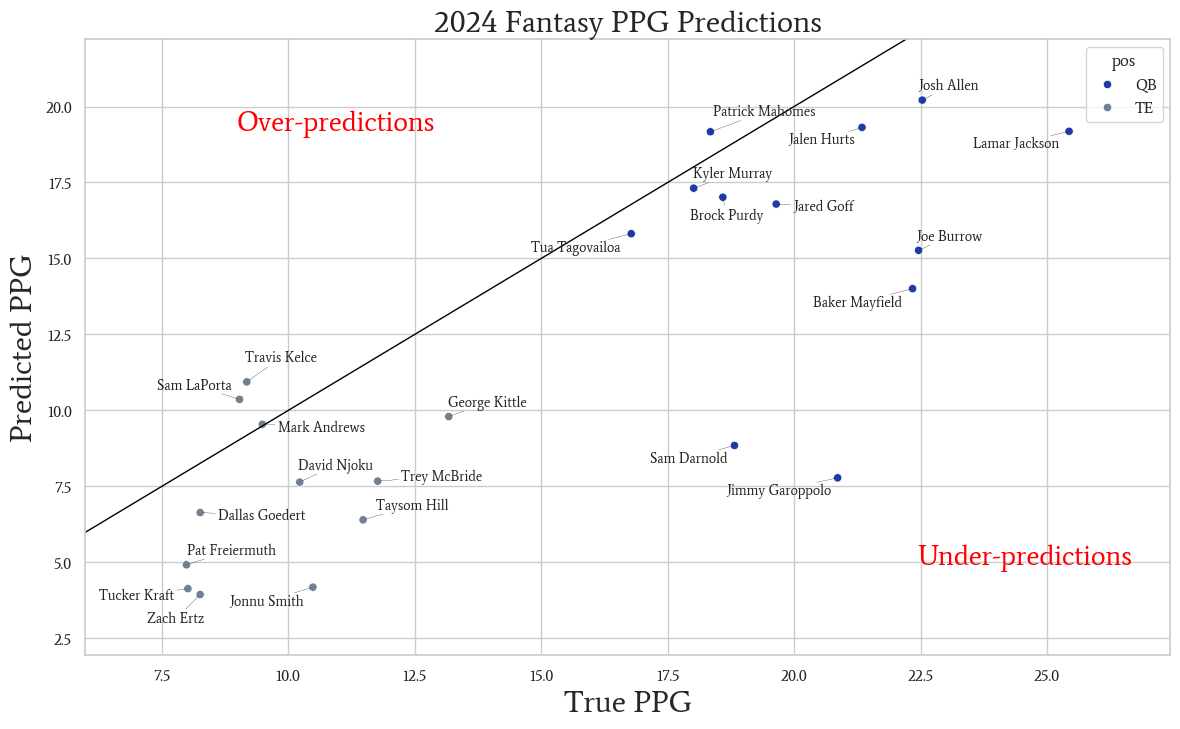

In [8]:
# get replacement-level players (top 12 QBs, 30 RBs, 42 WRs, and 12 TEs)
qb_repl = qb_preds.head(12)
rb_repl = rb_preds.head(30)
wr_repl = wr_te_preds.query('pos == "WR"').head(42)
te_repl = wr_te_preds.query('pos == "TE"').head(12)

# plot QBs and TEs
plot_2024_preds(pd.concat([qb_repl, te_repl]))

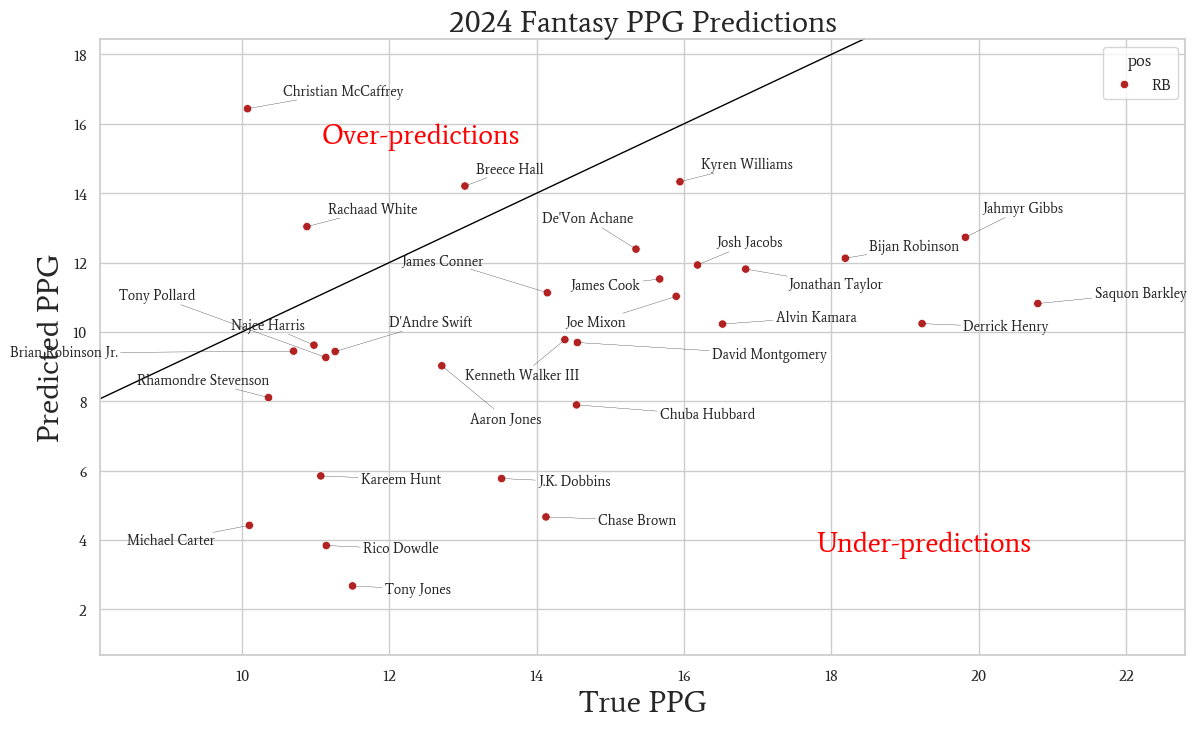

In [9]:
# plot RBs
plot_2024_preds(rb_repl)

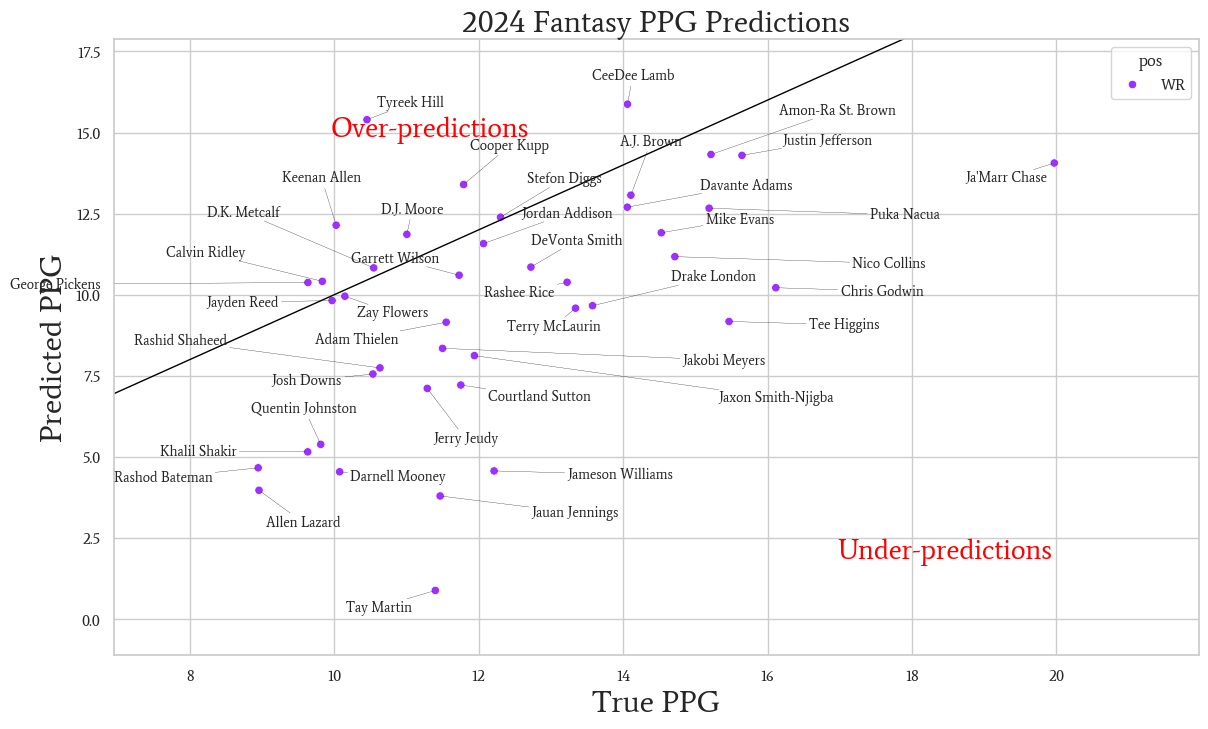

In [10]:
# plot WRs
plot_2024_preds(wr_repl)

- Overall, the models have a tendency to underpredict the top-performing players.

# 2025 Predictions

In [11]:
# get X and y for the 3 subsets
X_qb, y_qb = get_X_y(qb)
X_rb, y_rb = get_X_y(rb)
X_wr_te, y_wr_te = get_X_y(wr_te)

In [12]:
# get positional subsets for 2024
qb_2024, rb_2024, wr_te_2024 = get_pos_subsets(features_2024)

# fit models on all other data (1970-2023)
xgb_qb.fit(X_qb, y_qb)
xgb_rb.fit(X_rb, y_rb)
xgb_wr_te.fit(X_wr_te, y_wr_te)

# split WR and TE
wr_2024 = wr_te_2024.query('Pos == "WR"')
te_2024 = wr_te_2024.query('Pos == "TE"')

# get 2025 predictions for each position
qb_preds_2025 = get_2025_preds(qb_2024, xgb_qb)
rb_preds_2025 = get_2025_preds(rb_2024, xgb_rb)
wr_preds_2025 = get_2025_preds(wr_2024, xgb_wr_te)
te_preds_2025 = get_2025_preds(te_2024, xgb_wr_te)

# get replacement-level players (top 12 QBs, 30 RBs, 42 WRs, and 12 TEs)
qb_repl = qb_preds_2025.head(12)
rb_repl = rb_preds_2025.head(30)
wr_repl = wr_preds_2025.head(42)
te_repl = te_preds_2025.head(12)

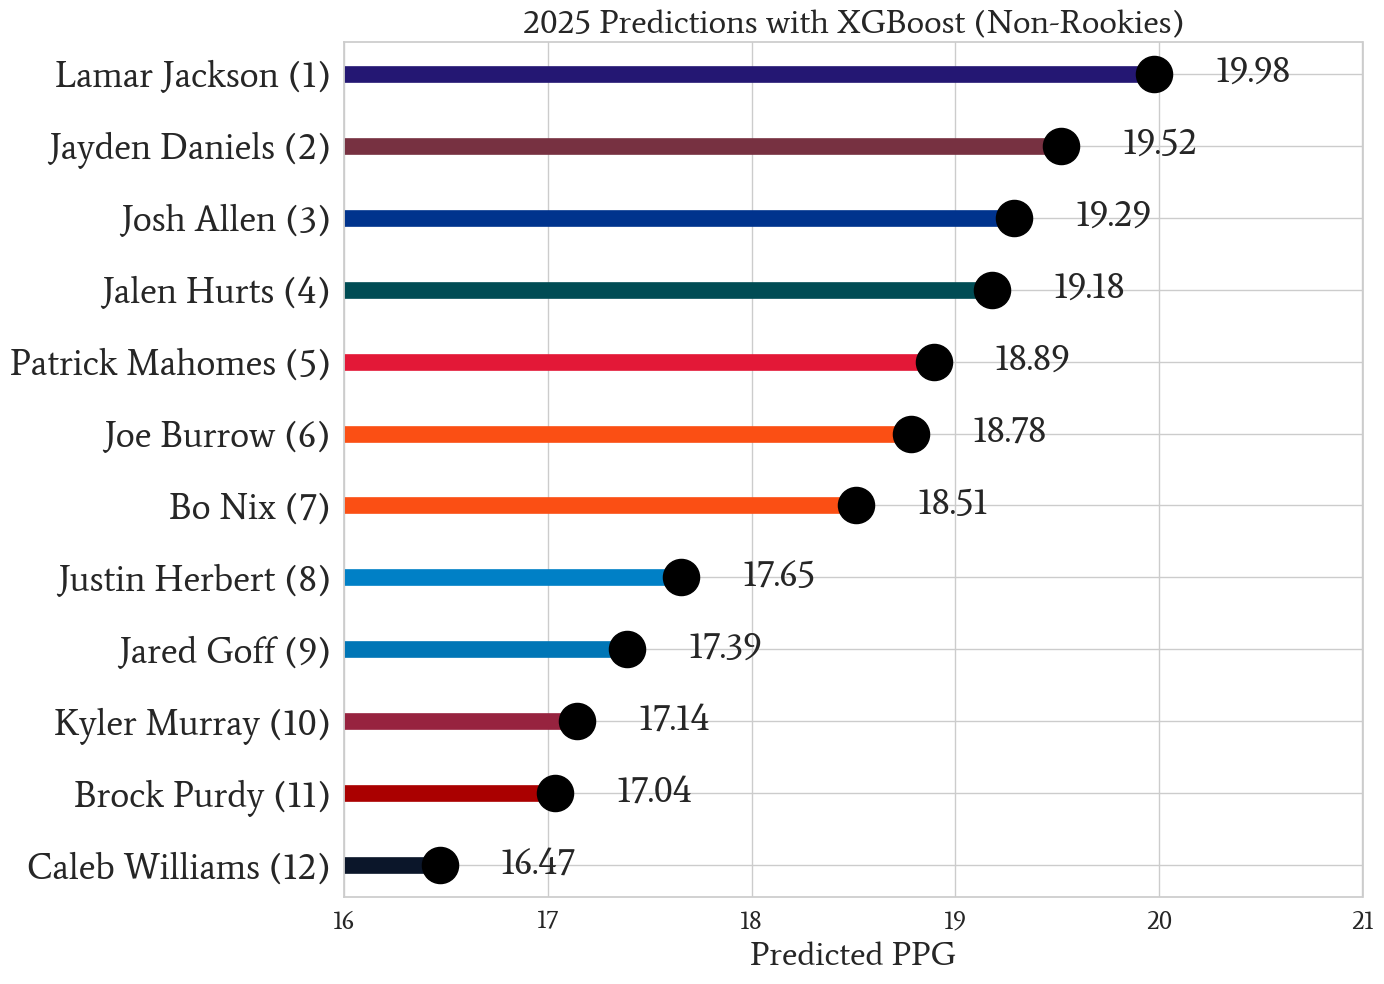

In [ ]:
# plot QBs
plot_2025_preds(qb_repl, pos='QB', xlabel='Predicted PPG', xmin=16, xmax=21)

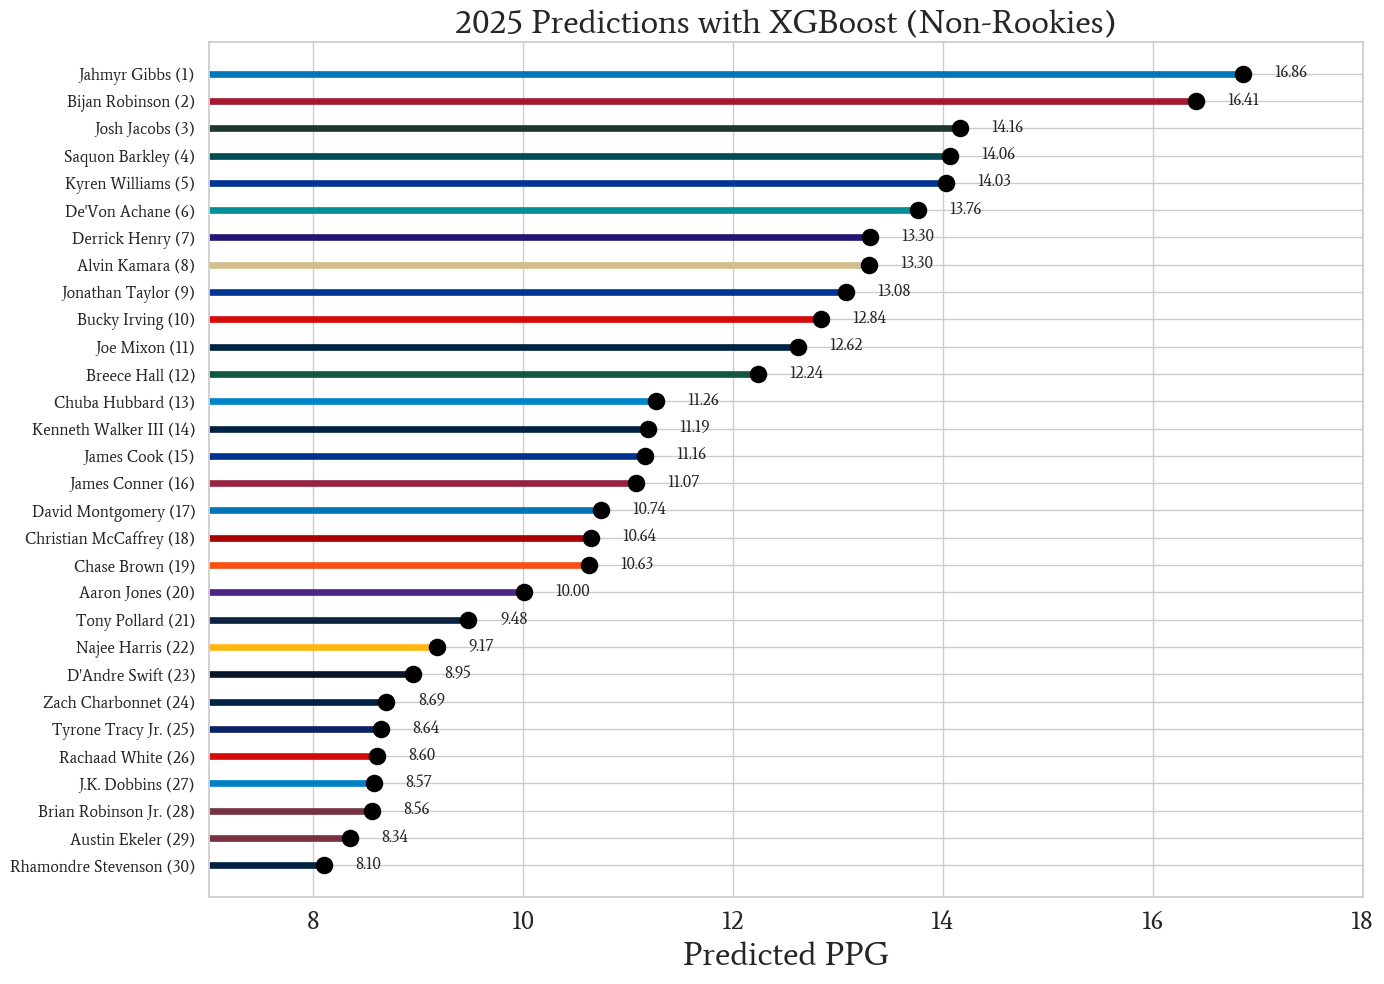

In [ ]:
# plot RBs
plot_2025_preds(rb_repl, pos='RB', xlabel='Predicted PPG', xmin=7, xmax=18)

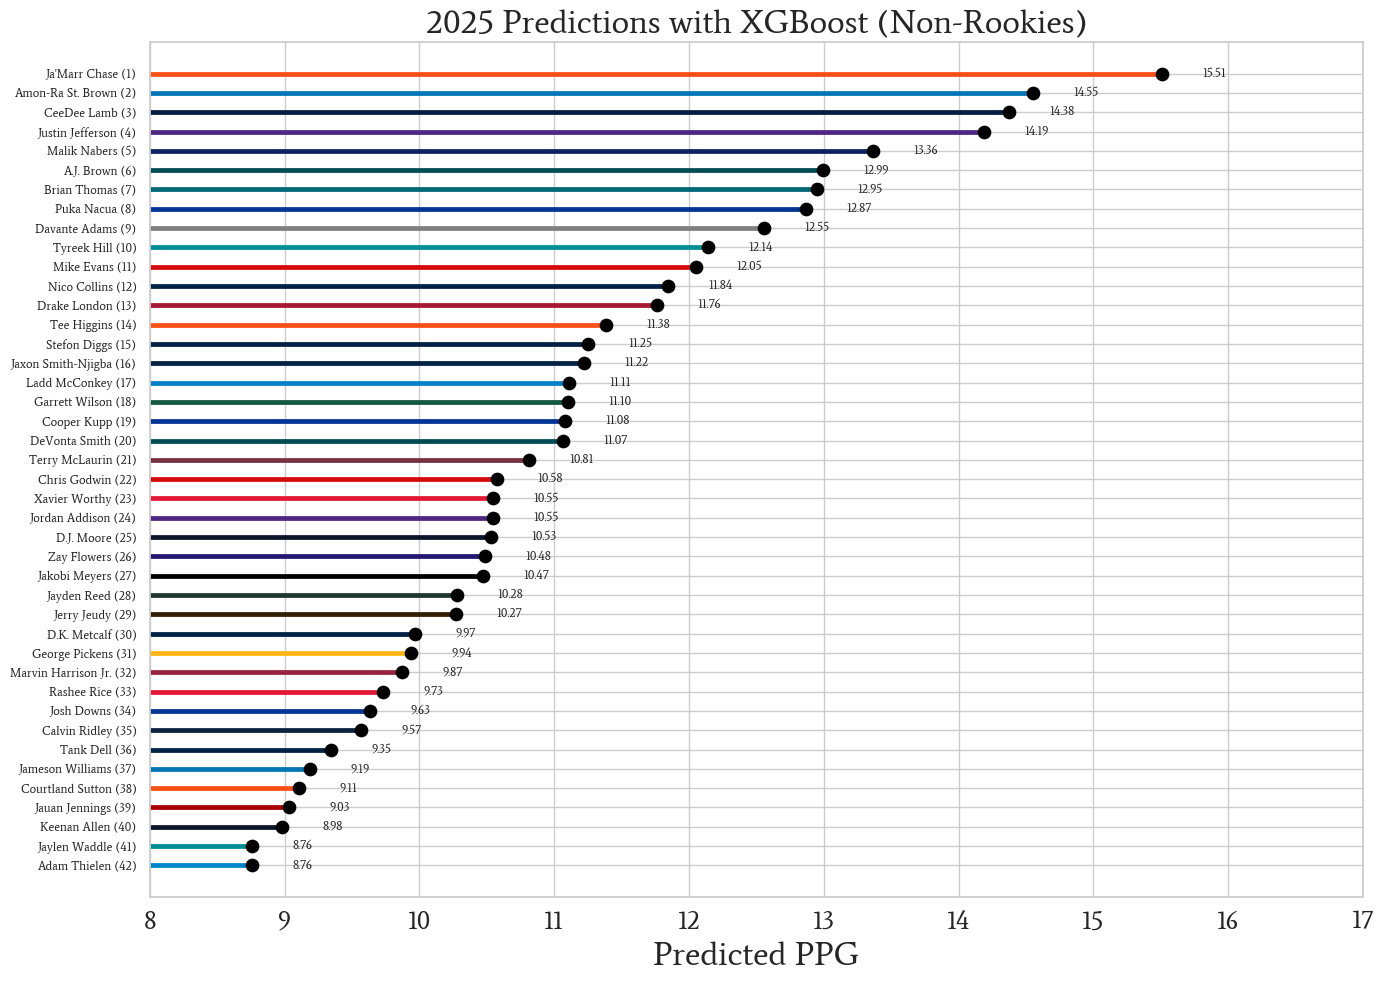

In [ ]:
# plot WRs
plot_2025_preds(wr_repl, pos='WR', xlabel='Predicted PPG', xmin=8, xmax=17)

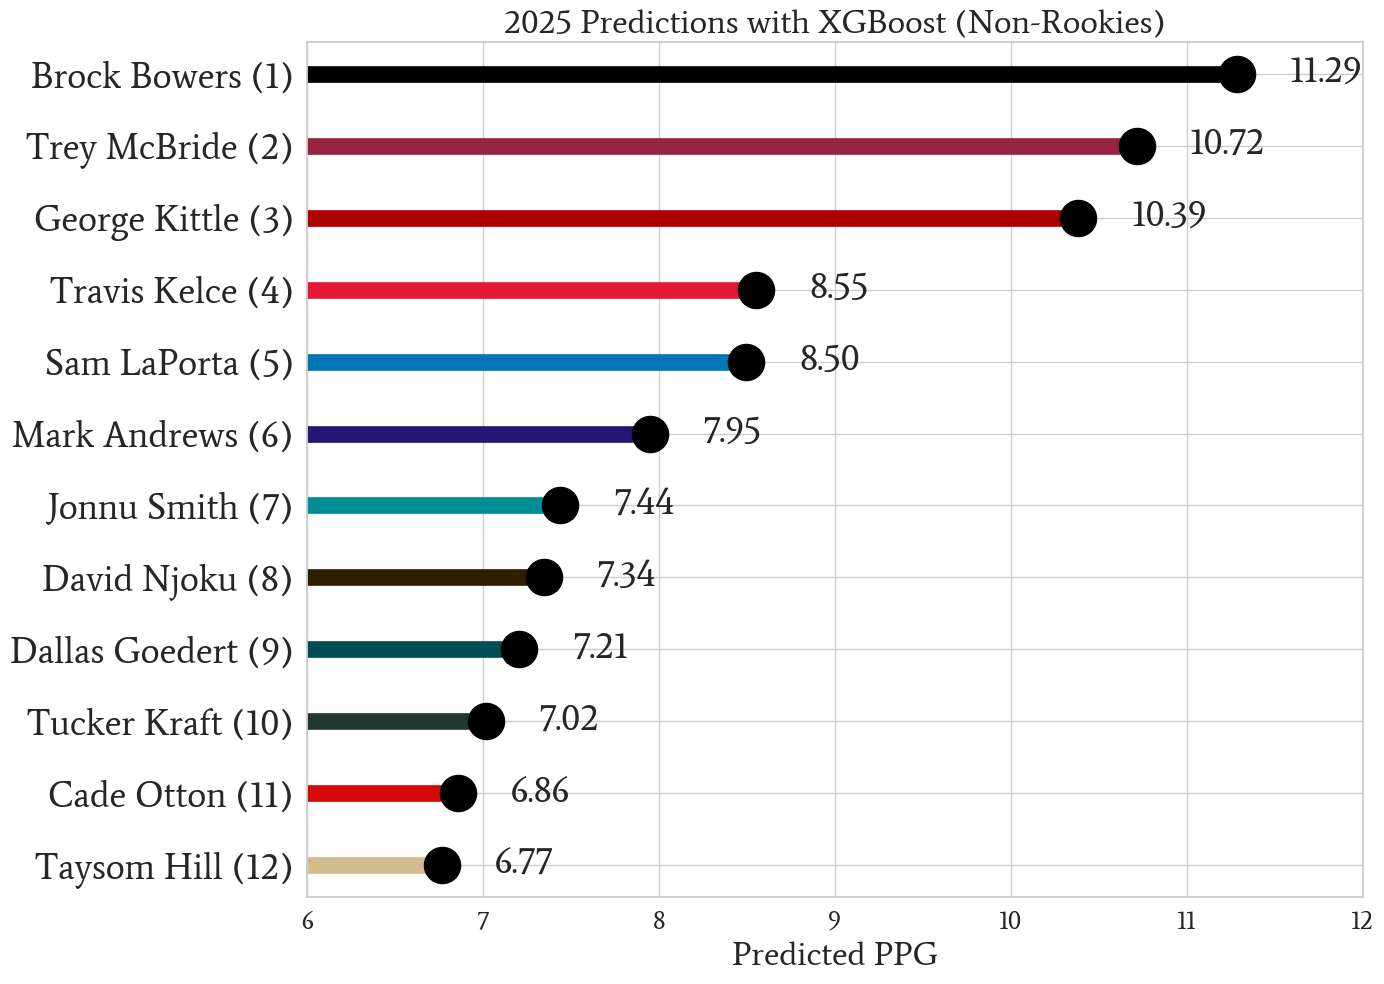

In [ ]:
# plot TEs
plot_2025_preds(te_repl, pos='TE', xlabel='Predicted PPG', xmin=6, xmax=12)

In [ ]:
# combine
preds_2025 = pd.concat([qb_preds_2025, rb_preds_2025, wr_preds_2025, te_preds_2025], axis=0).reset_index(drop=True)[['player', 'team', 'pos', 'y_pred']]

# rename pred col
preds_2025 = preds_2025.rename(columns={'y_pred': 'ppg_pred'})

# save
preds_2025.to_csv('./data/clean/ppg_predictions_2025.csv', index=False)